# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import os


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization

In [7]:
plt.style.use('fivethirtyeight')

# Histograms

D:\Anaconda_Installation\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


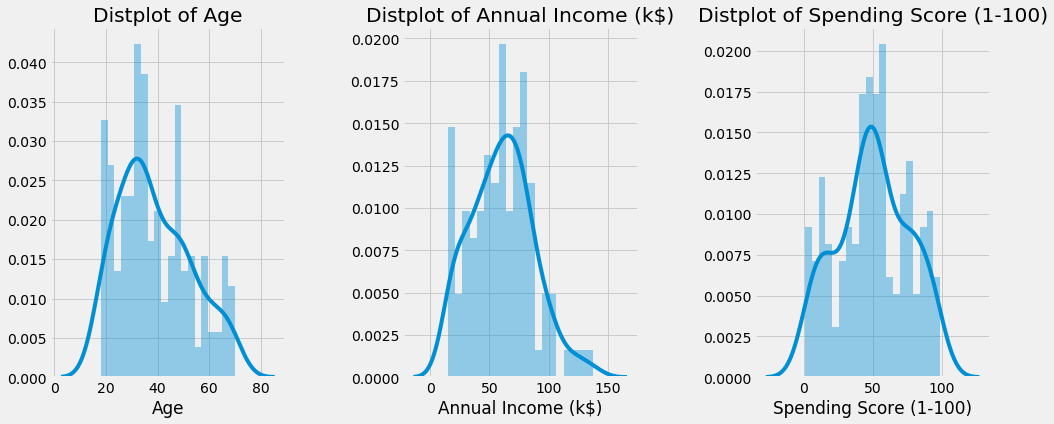

In [8]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

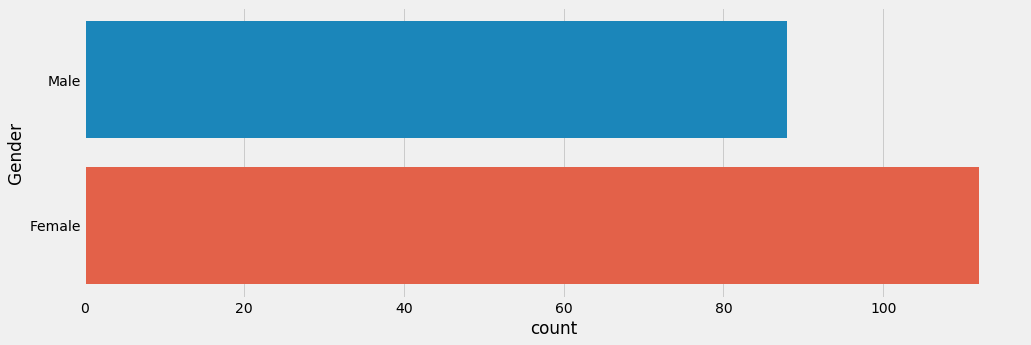

In [9]:
# Count plot of Gender
plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'Gender', data = df)
plt.show()

# Plotting the Relationship between Age, Annual Income and Spending Score

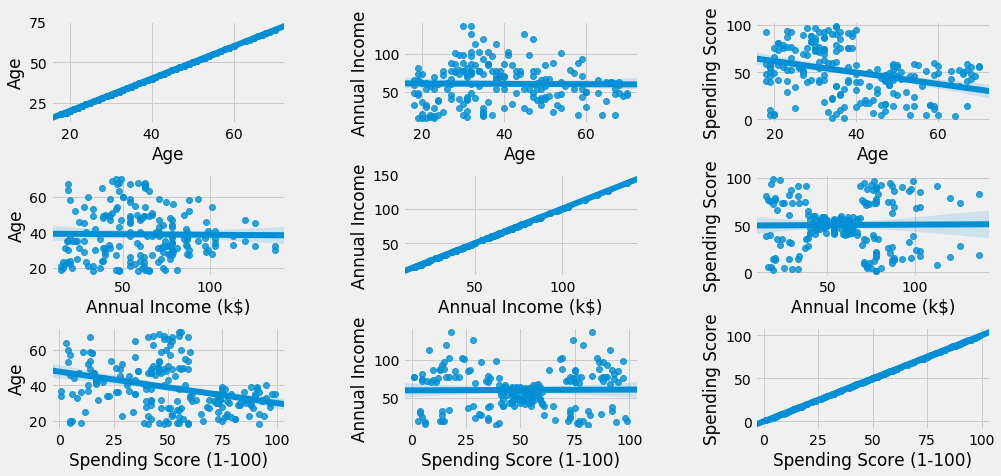

In [10]:
plt.figure(1, figsize = (15, 7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

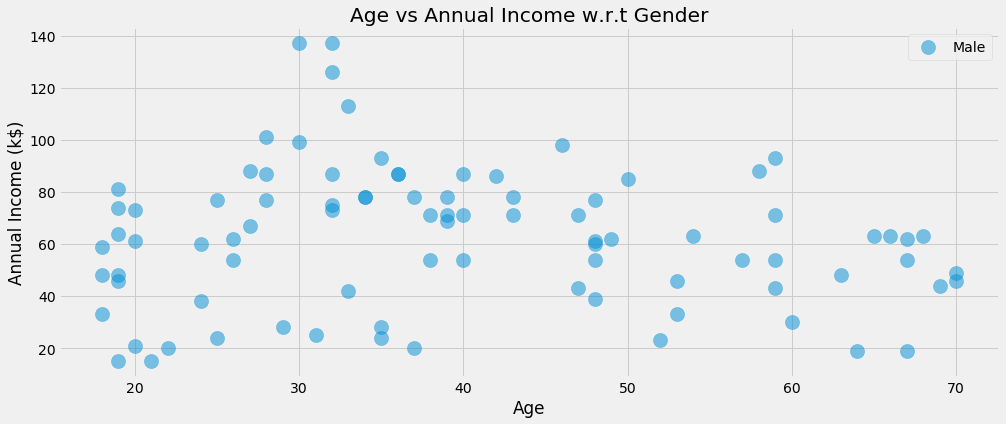

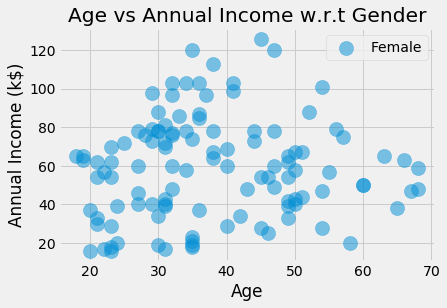

In [11]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender], s=200, alpha=0.5, label=gender)
    plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
    plt.title('Age vs Annual Income w.r.t Gender')
    plt.legend()
    plt.show()

# Distribution of values in Age, Annual Income and Spending Score according to Gender

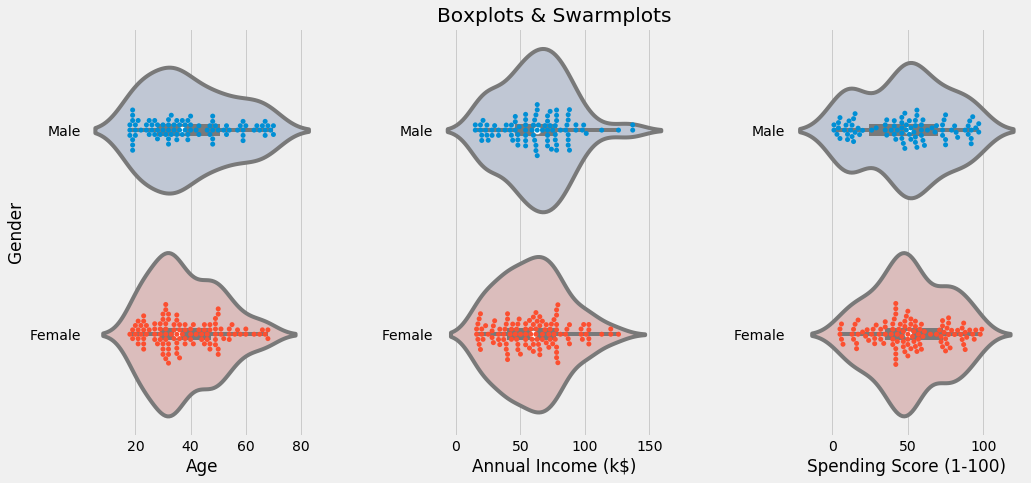

In [12]:
plt.figure(1, figsize = (15, 7))
n = 0 
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df, palette = 'vlag')
    sns.swarmplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n ==1 else '')
    plt.title('Boxplots & Swarmplots' if n ==2 else '')
plt.show()

# Clustering using K-Means

#### 1. Segmentation using Age and Spending Score

#Empirical evaluation of the impact of k-means initialization
#Evaluate the ability of k-means initializations strategies to make the algorithm convergence robust as measured by the
#relative standard deviation of the inertia of the clustering (i.e. the sum of squared distances to the nearest cluster center).


In [13]:
#Empirical evaluation of the impact of k-means initialization
#Evaluate the ability of k-means initializations strategies to make the algorithm convergence robust as measured by the
#relative standard deviation of the inertia of the clustering (i.e. the sum of squared distances to the nearest cluster center).

X1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, 
                        algorithm='elkan'))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

#### Selecting N Clusters based in inertia (Squared Distance between Centroids and data points, should be less)

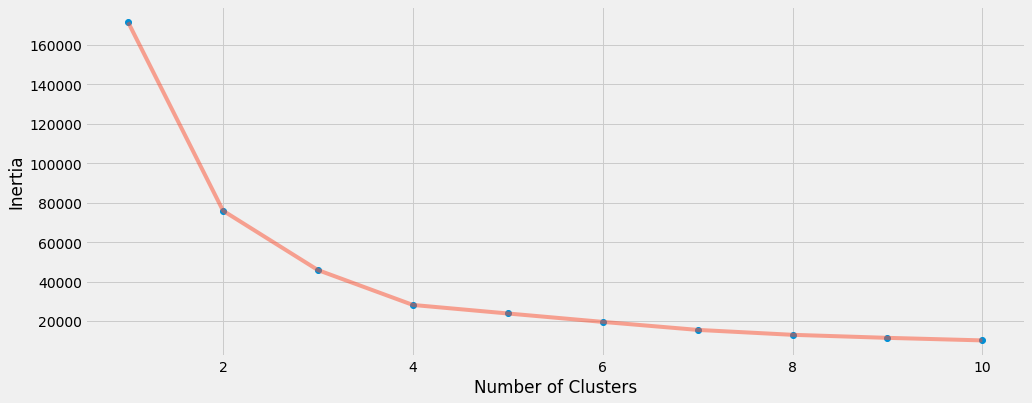

In [14]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [16]:
# n_clusters : int, optional, default: 8
#The number of clusters to form as well as the number of centroids to generate.
#init : {‘k-means++’, ‘random’ or an ndarray}
#Method for initialization, defaults to ‘k-means++’:

#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

#‘random’: choose k observations (rows) at random from data for the initial centroids.

#If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

#n_init : int, default: 10
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

#max_iter : int, default: 300
#Maximum number of iterations of the k-means algorithm for a single run.

#tol : float, default: 1e-4
#Relative tolerance with regards to inertia to declare convergence

#precompute_distances : {‘auto’, True, False}
#Precompute distances (faster but takes more memory).

#‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.

#True : always precompute distances

#False : never precompute distances

#random_state : int, RandomState instance or None (default)
#Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

#algorithm : “auto”, “full” or “elkan”, default=”auto”
#K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the 
#triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.


algorithm = (KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,
                   algorithm='elkan'))
algorithm.fit(X1)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

# PROJECT

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from sklearn.datasets import make_blobs

#n_samples : int or array-like, optional (default=100)
#If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

#n_features : int, optional (default=2)
#The number of features for each sample.

#centers : int or array of shape [n_centers, n_features], optional
#(default=None) The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

#cluster_std : float or sequence of floats, optional (default=1.0)
#The standard deviation of the clusters.

#random_state : int, RandomState instance or None (default)
#Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. 


In [19]:
#n_samples : int or array-like, optional (default=100)
#If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

#n_features : int, optional (default=2)
#The number of features for each sample.

#centers : int or array of shape [n_centers, n_features], optional
#(default=None) The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

#cluster_std : float or sequence of floats, optional (default=1.0)
#The standard deviation of the clusters.

#random_state : int, RandomState instance or None (default)
#Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. 

data = make_blobs(n_samples=200, n_features=5, centers=6, cluster_std=1.8, random_state=101)

In [20]:
data[0].shape

(200, 5)

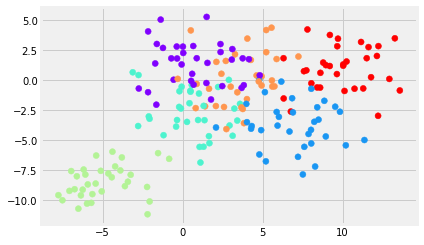

In [21]:
plt.scatter(data[0][:,0], data[0][:, 1], c=data[1], cmap='rainbow')

In [22]:
from sklearn.cluster import KMeans

The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.

The average complexity is given by O(k n T), were n is the number of samples and T is the number of iteration.

The worst case complexity is given by O(n^(k+2/p)) with n = n_samples, p = n_features. (D. Arthur and S. Vassilvitskii, 
‘How slow is the k-means method?’ SoCG2006)

In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

If the algorithm stops before fully converging (because of tol or max_iter), labels_ and cluster_centers_ will not be consistent, i.e. the cluster_centers_ will not be the means of the points in each cluster. Also, the estimator will reassign labels_ after the last iteration to make labels_ consistent with predict on the training set.

# n_clusters : int, optional, default: 8
#The number of clusters to form as well as the number of centroids to generate.
#init : {‘k-means++’, ‘random’ or an ndarray}
#Method for initialization, defaults to ‘k-means++’:

#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

#‘random’: choose k observations (rows) at random from data for the initial centroids.

#If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

#n_init : int, default: 10
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

#max_iter : int, default: 300
#Maximum number of iterations of the k-means algorithm for a single run.

#tol : float, default: 1e-4
#Relative tolerance with regards to inertia to declare convergence

#precompute_distances : {‘auto’, True, False}
#Precompute distances (faster but takes more memory).

#‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.

#True : always precompute distances

#False : never precompute distances

#random_state : int, RandomState instance or None (default)
#Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

#algorithm : “auto”, “full” or “elkan”, default=”auto”
#K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the 
#triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.


In [23]:
# n_clusters : int, optional, default: 8
#The number of clusters to form as well as the number of centroids to generate.
#init : {‘k-means++’, ‘random’ or an ndarray}
#Method for initialization, defaults to ‘k-means++’:

#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

#‘random’: choose k observations (rows) at random from data for the initial centroids.

#If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

#n_init : int, default: 10
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

#max_iter : int, default: 300
#Maximum number of iterations of the k-means algorithm for a single run.

#tol : float, default: 1e-4
#Relative tolerance with regards to inertia to declare convergence

#precompute_distances : {‘auto’, True, False}
#Precompute distances (faster but takes more memory).

#‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.

#True : always precompute distances

#False : never precompute distances

#random_state : int, RandomState instance or None (default)
#Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

#algorithm : “auto”, “full” or “elkan”, default=”auto”
#K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the 
#triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.

Kmeans = KMeans(n_clusters=6)

In [24]:
Kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
Kmeans.cluster_centers_

array([[ 9.88201208,  0.97578637,  1.71418433,  4.59933496,  0.40445949],
       [ 0.59461063, -2.67134591, -6.18998831,  5.85392502,  9.1492613 ],
       [ 0.78085474,  1.40386974, -9.10837682, -6.82814774,  3.25192482],
       [-4.93845699, -8.44823846,  2.27608162,  4.47611452, -4.36557341],
       [ 6.89082187, -3.67581827,  8.10050167,  4.48244885, -6.59278313],
       [ 3.57775488,  0.12930165, -9.2418493 , -6.75225782, -6.30585095]])

In [26]:
Kmeans.labels_

array([1, 1, 1, 0, 4, 5, 1, 2, 5, 5, 2, 4, 1, 3, 4, 2, 4, 5, 5, 4, 5, 3,
       0, 0, 5, 3, 5, 5, 2, 3, 2, 3, 3, 2, 3, 2, 1, 4, 5, 2, 4, 5, 4, 2,
       2, 2, 3, 0, 5, 0, 3, 1, 2, 1, 2, 0, 0, 1, 3, 4, 1, 0, 1, 1, 3, 3,
       5, 3, 2, 5, 1, 2, 0, 2, 5, 4, 2, 2, 3, 1, 2, 1, 1, 0, 3, 5, 5, 4,
       4, 4, 5, 5, 4, 4, 3, 2, 1, 0, 4, 2, 0, 4, 0, 3, 4, 3, 3, 1, 3, 4,
       3, 5, 0, 2, 3, 5, 2, 3, 0, 2, 4, 5, 0, 1, 2, 4, 1, 2, 1, 3, 5, 1,
       3, 4, 2, 2, 2, 0, 1, 5, 0, 0, 3, 1, 5, 3, 1, 0, 0, 4, 4, 0, 0, 0,
       3, 0, 1, 5, 4, 0, 5, 2, 2, 4, 3, 5, 4, 1, 1, 4, 0, 5, 4, 5, 0, 1,
       2, 0, 1, 4, 3, 1, 1, 3, 0, 0, 5, 4, 2, 3, 4, 2, 0, 4, 1, 5, 3, 5,
       0, 4])

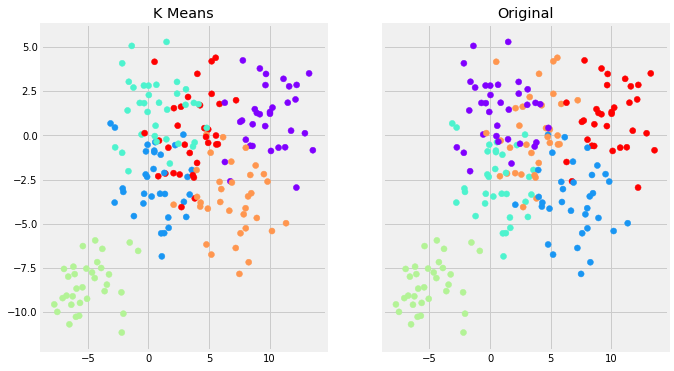

In [27]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=Kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')